In [7]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("anthony-wss/interpolate-UT")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

df = pd.json_normalize([summary_list[i] | config_list[i] for i in range(len(summary_list))], sep='_')
df.columns

Index(['_step', '_runtime', 'test_acc', 'train_acc', 'valid_acc', 'ure',
       'scel', '_timestamp', 'training_loss', 'lr', 'algo', 'seed', 'alpha',
       'model', 'data_aug', 'dataset_name', 'data_cleaning_rate',
       'best_epoch-valid_acc_train_acc', 'best_epoch-valid_acc_valid_acc',
       'best_epoch-valid_acc_training_loss', 'best_epoch-valid_acc_ure',
       'best_epoch-valid_acc_scel', 'best_epoch-valid_acc_epoch',
       'best_epoch-valid_acc_test_acc', '_wandb_runtime',
       'best_epoch-ure_test_acc', 'best_epoch-ure_train_acc',
       'best_epoch-ure_valid_acc', 'best_epoch-ure_training_loss',
       'best_epoch-ure_ure', 'best_epoch-ure_scel', 'best_epoch-ure_epoch',
       'best_epoch-scel_test_acc', 'best_epoch-scel_train_acc',
       'best_epoch-scel_valid_acc', 'best_epoch-scel_training_loss',
       'best_epoch-scel_ure', 'best_epoch-scel_scel', 'best_epoch-scel_epoch'],
      dtype='object')

In [12]:
df['dataset_name']

0     clcifar20
1     clcifar20
2     clcifar20
3     clcifar20
4     clcifar20
5     clcifar10
6     clcifar10
7     clcifar10
8     clcifar10
9     clcifar10
10    clcifar20
11    clcifar20
12    clcifar20
13    clcifar20
14    clcifar20
15    clcifar10
16    clcifar10
17    clcifar10
18    clcifar10
19    clcifar10
20    clcifar20
21    clcifar20
22    clcifar20
23    clcifar20
24    clcifar20
25    clcifar10
26    clcifar10
27    clcifar10
28    clcifar10
29    clcifar10
Name: dataset_name, dtype: object

In [13]:
import pandas as pd

for alpha in [0.25, 0.5, 0.75]:
    print("eta", alpha)
    for dataset_name in ['clcifar10', 'clcifar20']:
        sub_df = df.loc[(df['dataset_name'] == dataset_name) & (df['alpha'] == alpha)]
        
        print(
            dataset_name, 
            alpha,
            sub_df.sort_values('valid_acc', ascending=False).iloc[0]['test_acc'],
            sub_df.sort_values('best_epoch-valid_acc_valid_acc', ascending=False).iloc[0]['best_epoch-valid_acc_test_acc']
        )

eta 0.25
clcifar10 0.25 0.3153 0.3924
clcifar20 0.25 0.1427 0.1868
eta 0.5
clcifar10 0.5 0.314 0.3849
clcifar20 0.5 0.1522 0.1674
eta 0.75
clcifar10 0.75 0.3487 0.3693
clcifar20 0.75 0.1185 0.1243


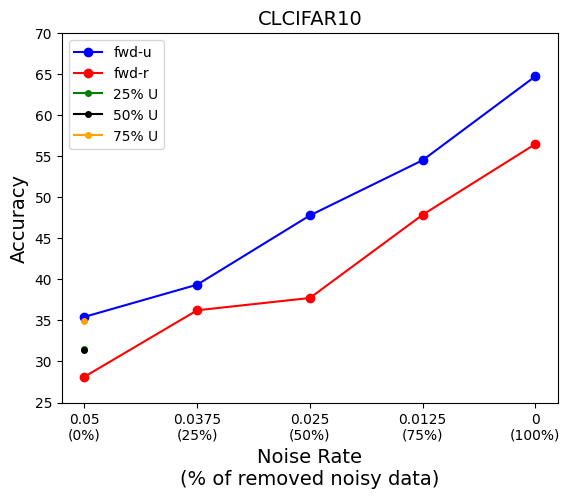

In [30]:
# fwd-r, 25% U + 75% T, ..., fwd-U
res_clcifar10 = [28.14, 31.53, 31.4, 34.87, 35.43]
res_clcifar10_es = [40.16, 39.24, 38.49, 36.93, 36.97]

res_clcifar20 = []
import matplotlib.pyplot as plt

# Define the data
fwd_u = [35.43, 39.35, 47.78, 54.5, 64.72]
fwd_r = [28.14, 36.23, 37.73, 47.86, 56.47]

uniform_clcifar10_fwd = 48.44

# Create the plot
fig, ax = plt.subplots()
ax.plot(fwd_u, linestyle='solid', marker='o', color='blue', label='fwd-u')
# ax.plot(fwd_u_es, linestyle='--', marker='^', color='blue', label='fwd-u(ES)')
ax.plot(fwd_r, linestyle='solid', marker='o', color='red', label='fwd-r')

ax.plot(0, res_clcifar10[1], marker="o", markersize=4, color='green', label='25% U')
ax.plot(0, res_clcifar10[2], marker="o", markersize=4, color='black', label='50% U')
ax.plot(0, res_clcifar10[3], marker="o", markersize=4, color='orange', label='75% U')
# ax.plot(fwd_r_es, linestyle='--', marker='^', color='red', label='fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

ax.set_xticks(range(len(fwd_u)))
ax.set_xticklabels(xticks)

yticks = list(range(25, 71, 5))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('CLCIFAR10', fontsize=14)
ax.legend()

plt.savefig("./fwd-int-clcifar10.png")
plt.show()


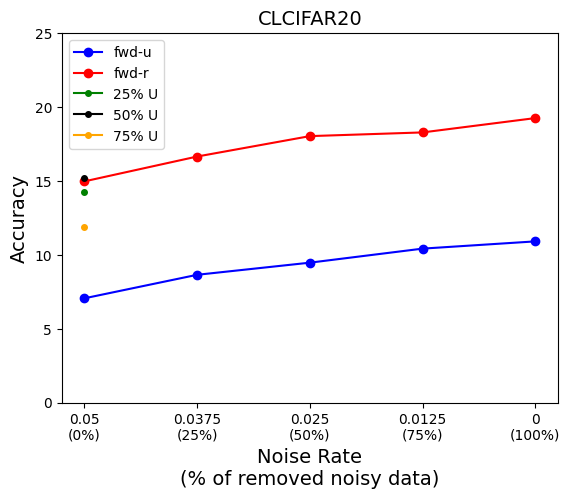

In [31]:
# fwd-r, 25% U + 75% T, ..., fwd-U
res_clcifar20 = [14.96, 14.27, 15.22, 11.85, 7.05]

fwd_u = [7.05, 8.64, 9.46, 10.41, 10.9]
fwd_r = [14.96, 16.64, 18.02, 18.27, 19.24]
"""
eta 0.25
clcifar10 0.25 0.3153 0.3924
clcifar20 0.25 0.1427 0.1868
eta 0.5
clcifar10 0.5 0.314 0.3849
clcifar20 0.5 0.1522 0.1674
eta 0.75
clcifar10 0.75 0.3487 0.3693
clcifar20 0.75 0.1185 0.1243
"""

import matplotlib.pyplot as plt

uniform_clcifar10_fwd = 48.44

# Create the plot
fig, ax = plt.subplots()
ax.plot(fwd_u, linestyle='solid', marker='o', color='blue', label='fwd-u')
# ax.plot(fwd_u_es, linestyle='--', marker='^', color='blue', label='fwd-u(ES)')
ax.plot(fwd_r, linestyle='solid', marker='o', color='red', label='fwd-r')

ax.plot(0, res_clcifar20[1], marker="o", markersize=4, color='green', label='25% U')
ax.plot(0, res_clcifar20[2], marker="o", markersize=4, color='black', label='50% U')
ax.plot(0, res_clcifar20[3], marker="o", markersize=4, color='orange', label='75% U')
# ax.plot(fwd_r_es, linestyle='--', marker='^', color='red', label='fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

ax.set_xticks(range(len(fwd_u)))
ax.set_xticklabels(xticks)

yticks = list(range(0, 30, 5))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('CLCIFAR20', fontsize=14)
ax.legend()

plt.savefig("./fwd-int-clcifar20.png")
plt.show()
